# Combine PCA and K-means Clustering

Using a dimensionality reduction step such as PCA before a data classification can both improve classification performance and reduce noise in the data.

In this TD, we consider customer segmentation. It consists in grouping customers based on common characteristics such as age, gender, living area, spending behavior, etc. So that we can market the customers effectively.

Our objective is to help the marketing department for them to launch new products and sales based on the segmentation. Therefore we will save our time and money by marketing a specific group of customers with selected products.

How Did we collect the data by the way?

All data has been collected through the loyalty cards they use at checkout :)

We will utilize K-Means and PCA algorithms for this project and see how we define new grouped customers!

In [1]:
### Data Analysis and Manipulation 
import pandas as pd 
import numpy as np
### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
## this is for styling
### Data Standardization and Modeling with K-Means and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df= pd.read_csv('segmentation_data.csv', index_col = 0)

<font color='green'>Before starting any project, We need to understand the business problem and dataset first.</font>

In [3]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df.dtypes

Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

## Variable description
Here is the description of the variables.

ID: Shows a unique identification of a customer.

Sex: Biological sex (gender) of a customer. In this dataset, there are only 2 different options.

    0: male

    1: female

Marital status: Marital status of a customer.

    0: single

    1: non-single (divorced / separated / married / widowed)

Age: The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of the creation of the dataset

    18 Min value (the lowest age observed in the dataset)

    76 Max value (the highest age observed in the dataset)

Education: Level of education of the customer.

    0:other / unknown

    1: high school

    2: university

    3: graduate school

Income: Self-reported annual income in US dollars of the customer.

    35832 Min value (the lowest income observed in the dataset)

    309364 Max value (the highest income observed in the dataset)

Occupation: Category of occupation of the customer.

    0: unemployed/unskilled

    1: skilled employee / official

    2: management / self-employed / highly qualified employee / officer

Settlement size: The size of the city that the customer lives in.

    0: small city

    1: mid-sized city

    2: big city



## Explore the data
<font color='green'> Visualize the raw data set on the two numerical features: Age and Income.</font>

<font color='green'>Compute the correlation between the variables.</font>

In [5]:
df['Age'].corr(df['Income'])

0.3406101637317351

## Data Preprocessing

We need to apply standardization to our features before using any distance-based machine learning model such as K-Means.

In general, we want to treat all the features equally and we can achieve that by transforming the features in such a way that their values fall within the same numerical range such as [0:1].

<font color='green'>Let us standardize the data. </font>

In [6]:
df_normalized=(df-np.min(df))/(np.max(df)-np.min(df))

c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


## K-means
Before applying the K-Means algorithm we need to choose how many clusters we would like to have.

But How?

There are two components: Within Clusters Sum of Squares (WCSS) and Elbow Method.

<font color='green'>Store each within clusters sum of squared value to wcss list.</font>

In [7]:
#creation de la liste de points 
wcss=[]

#nous allons appliquer l'Elbow méthode pour un nombre de cluster compris entre 1 et 10
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
     kmeans.fit(df_normalized)
#on ajoute chaque wcss à la liste 
     wcss.append(kmeans.inertia_)
print(wcss)


[1730.3292058262796, 1027.8897512780293, 806.7279647911286, 627.482448620152, 513.9660320259308, 404.765671718789, 363.11814001662884, 330.4096640529631, 308.52876815707776, 276.1389982649834]


<font color='green'>Let’s visualize them.</font>

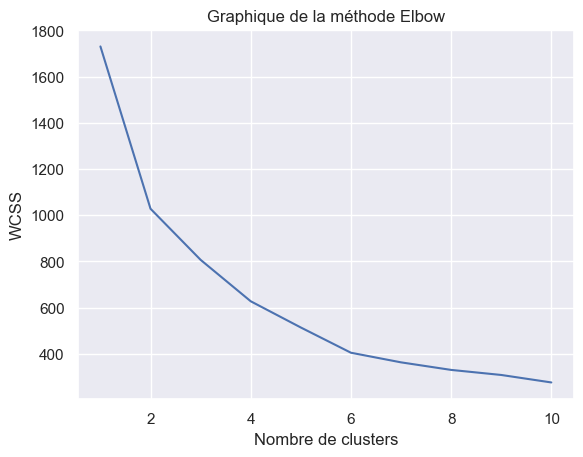

In [8]:
plt.plot(range(1,11),wcss)
plt.title('Graphique de la méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

<font color='green'>Choose the appropriate number of cluster and perform K-Means clustering.</font>

In [43]:
nb_clusters =6


<font color='green'>We create a new data frame with the original features and add a new column with the assigned clusters for each point.</font>

In [44]:
kmeans = KMeans(n_clusters=nb_clusters+1, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(df_normalized)


df_clustered= df_normalized.assign(Cluster=y_kmeans)
df_clustered.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
ID,,,,,,,,
100000001,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,0
100000002,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,3
100000003,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0,4
100000004,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5,0
100000005,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5,0


<font color='green'>Group the customers by clusters and see the average values for each variable.</font>

[0 1 2 3 4 5 6]


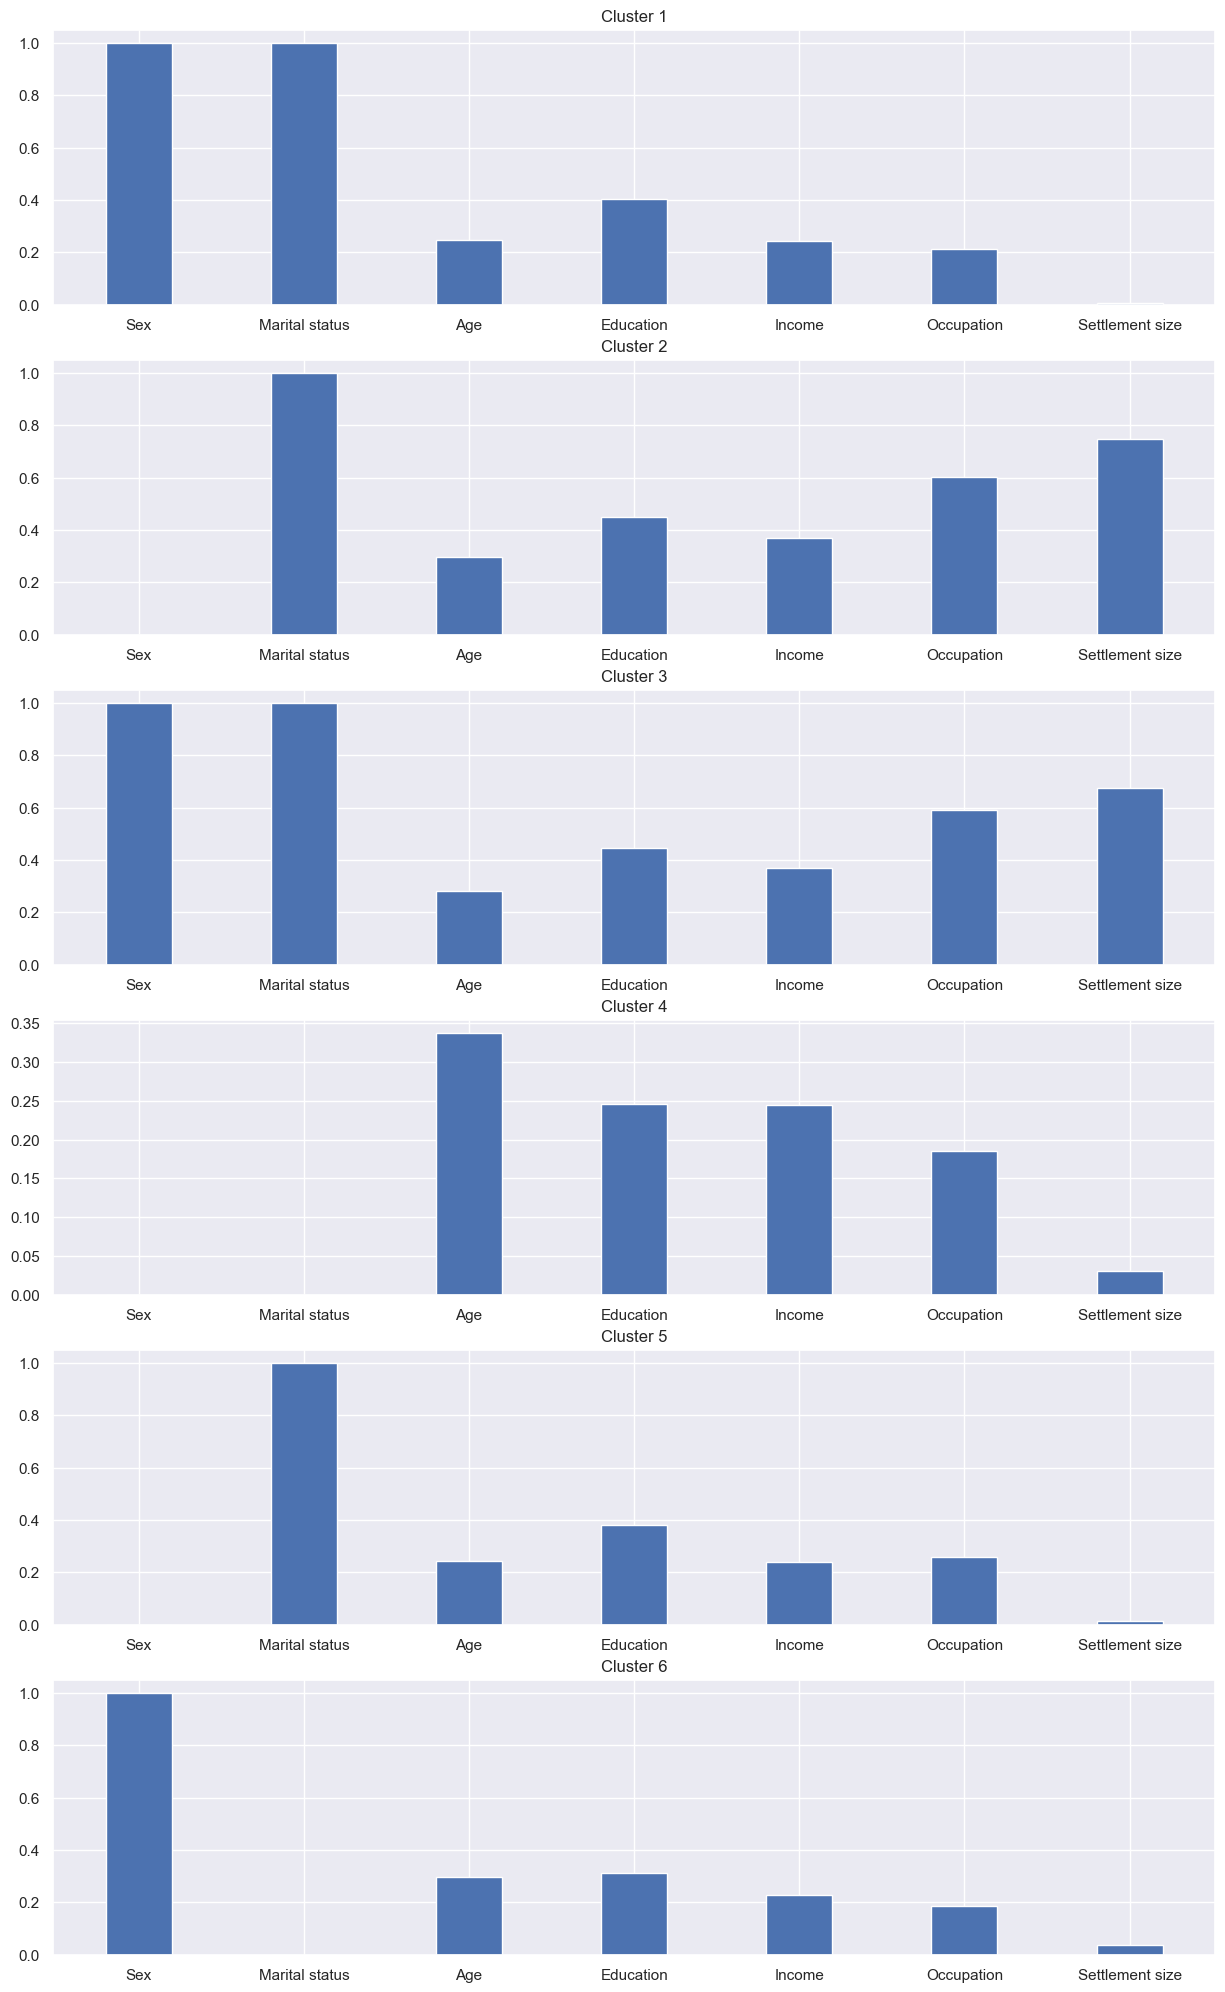

In [45]:
df_clustered = df_clustered.sort_values(by='Cluster')
#on initialise une liste pour stocker un dataframe par cluster
X=[]
#X_axis = np.arange(len(df_normalized.columns.values))
noms_colones=df_clustered.drop('Cluster',axis=1).columns.values
X_axis=np.arange(len(noms_colones))
print(X_axis)
for i in range(nb_clusters):
    #on ajoute à la liste les données pour chaque facteurs tout en retirant la colone des clusters que l'on ne veut pas afficher
    X.append(df_clustered[df_clustered['Cluster']==i+1].drop('Cluster',axis=1))
    #on remplace dans la liste chaque colones des dataframes par leur valeur moyenne
    X[i]=X[i].mean()

#initialisation de la figure
fig = plt.figure()
row=nb_clusters
column=1
gs = fig.add_gridspec(row,column)

#liste qui contiendra chaque graphique
axs=[]

#on ajoute à la liste un axe pour chaque graphique
for i in range(row):
    for k in range(column):
        axs.append(fig.add_subplot(gs[i, k]))
#on ajoute à chaque axe un graphique avec les données
for i in range(row*column):
    axs[i].bar(X_axis, X[i],0.4)
    axs[i].set_title('Cluster {}'.format(i+1))
    axs[i].set_xticks(X_axis, noms_colones)
    axs[i].axhline(0, linewidth=0.8)

#on rajoute des espaces entre les graphiques
#fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

#on agrandit la taille total de la figure
fig.set_figheight(25)
fig.set_figwidth(15)


<font color='green'>It’s time to interpret our new dataset,</font>

On remarque que chaque cluster, possède un seul type de sexe, de même pour le facteur marital status.
<br>
L'age cependant ne varie pas enormement.

<font color='green'>Let’s label the segment according to their relevance.</font>

<font color='green'>Create a plot to visualize each segment on variable age/income and provide an interpretation of the graph.</font>

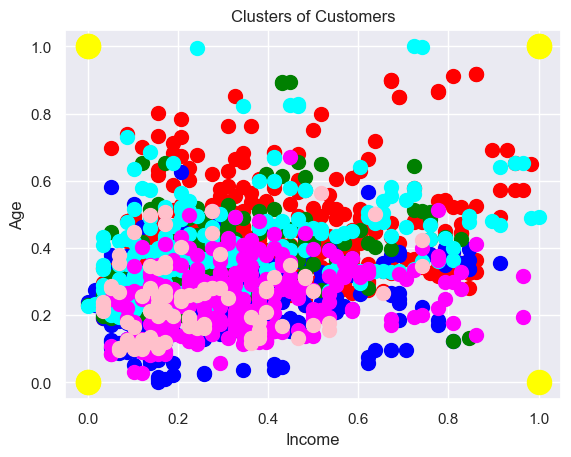

In [46]:
plt.scatter(df_clustered[df_clustered['Cluster']==0]['Age'],df_clustered[df_clustered['Cluster']==0]['Income'], s=100, c='red', label ='Cluster 1')
plt.scatter(df_clustered[df_clustered['Cluster']==1]['Age'],df_clustered[df_clustered['Cluster']==1]['Income'], s=100, c='blue', label ='Cluster 2')
plt.scatter(df_clustered[df_clustered['Cluster']==2]['Age'],df_clustered[df_clustered['Cluster']==2]['Income'], s=100, c='green', label ='Cluster 3')
plt.scatter(df_clustered[df_clustered['Cluster']==3]['Age'],df_clustered[df_clustered['Cluster']==3]['Income'], s=100, c='cyan', label ='Cluster 4')
plt.scatter(df_clustered[df_clustered['Cluster']==4]['Age'],df_clustered[df_clustered['Cluster']==4]['Income'], s=100, c='magenta', label ='Cluster 5')
plt.scatter(df_clustered[df_clustered['Cluster']==5]['Age'],df_clustered[df_clustered['Cluster']==5]['Income'], s=100, c='pink', label ='Cluster 6')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

On remarque que nos points sont mélangés, ainsi on peut en déduire que les dimensions entre les features income et age n'ont pas été très importantes lors de la séparation du dataset en cluster. 

We can conclude that K-Means did a decent job! However, it’s hard to separate segments from each other.

In the next section, we will combine PCA and K-Means to try to get a better result.

## PCA with K-Means for Better Visualization
What we will do here is apply dimensionality reduction to simplify our problem.

We will choose reasonable components in order to obtain a better clustering solution than with the standard K-Means. So that, we aim to see a nice and clear plot for our segmented groups.

<font color='green'> Apply PCA on the data.</font>

<font color='green'> Show the explained variance ratio by each component.</font>

<font color='green'>We now can plot the cumulative sum of explained variance.</font>

<font color='green'> Choose the appropriate number of components.</font>

<font color='green'> Study the chosen axis.</font>

<font color='green'>Let’s transform our data and save it in data_pca.</font>

## K-means clustering with PCA

Our new dataset is ready! It’s time to apply K-Means to our brand new dataset.

It is as simple as before! We follow the same steps as with standard K-Means.

However, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

Not only that, but they are ‘orthogonal’ to each other. This means that the difference between components is as big as possible.

There is some overlap between two classes. But, as a whole, all four segments are clearly separated. The spots where the two overlap are ultimately determined by the third component, which is not available on this graph.